In [1]:
__authors__    = "Ruben Dario Guerrero, PhD"
__credits__   = ["Ruben Dario Guerrero, PhD"]
__copyright_amp__ = "(c) Ruben Dario Guerrero"
__email__   = "rdguerrerom@unal.edu.co"
__license__   = "cc0-1.0"

#UNIDAD 1 - El átomo 

## Niveles de energía discretos y estructura atómica

###Niveles atómicos

La solucion de la ecuación de Schrödinger describe los niveles de energía de un atomó en el que no se tiene en cuuenta la interacción entre electrones. Tiene la siguiente forma:
$$
E \psi=-\frac{\hbar^{2}}{2 \mu} \nabla^{2} \psi-\frac{Z q^{2}}{4 \pi \varepsilon_{0} r} \psi
$$
Dond $q$ es la carga del electrón, $e r$ es la posicion del electrón relativa al nucleo, $|\vec r|= r$ s la distancia al nuucleo, $Z$ es la carga del nuecleo $\varepsilon_{0}$ es la permitividad del vacio y finalmente
$$
\mu=\frac{m_{q} m_{p}}{m_{q}+m_{p}},
$$
es la masa reducida del electrón, siendo $m_{p}$ la masa del protón y $m_{q}$ la masa del electrón.
Típicamente esta ecuación se resuelve planteado una separación de variables como siguue:
$$
\psi(r, \theta, \varphi)=R(r) Y_{\ell}^{m}(\theta, \varphi)=R(r) \Theta(\theta) \Phi(\varphi)
$$
Donde $R$ es la función radial y $Y_{\ell}^{m}$ son los esféricos armónicos dee grado $\ell$ y orden $m$. El caso $Z=1$ s el único cuya solución analítica exacta se conoce: 
$$
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_{0}}\right)^{3} \frac{(n-\ell-1) !}{2 n[(n+t) !]}} e^{-r / n a_{0}}\left(\frac{2 r}{n a_{0}}\right)^{\ell} L_{n-\ell-1}^{2 \ell+1}\left(\frac{2 r}{n a_{0}}\right) \cdot Y_{\ell}^{m}(\theta, \varphi)
$$
Donde se ha definido el rádio de Bohr,
$$
a_{0}=\frac{4 \pi \varepsilon_{0} \hbar^{2}}{m_{q} q^{2}} \approx 0.52 \unicode{x212B}
$$
Los polinómios ganaralizados de Laguerre, $L_{n-\ell-1}^{2 \ell+1}(\cdots)$, y los númueros cuánticos principal, $n$, azimutal, $\ell$, y magnético, $m$. los números cuánticos toman valores que satisfacen las siguientes condiciones:
$$
\begin{array}{l}
n=1,2,3, \ldots \\
\ell=0,1,2, \ldots, n-1 \\
m=-\ell, \ldots, \ell
\end{array}
$$
La strcutura de capas de un átomo se origina por el número cuántico $\ell$ y a cada capa se le asigna una letra según el valor de $\ell$:

$\ell$ | Letra      | # orbitales
--|:---------:|:-----------:
0|S      | 1
1|P   | 3
2|D   | 5
3|F   | 7
4|G   | 9
5|H   | 11
6|I   | 13

Cada orbital puede acomodar bien sea dos electrones (uno con espin $\uparrow$ y otro con espin $\downarrow$), o un espin (con espin $\uparrow$ o $\downarrow$), o ninguno.

### Como lucen los orbitales?

En este dominio, generalmente se definen incluyendo un factor de $ (- 1) ^ m $ (la convención de fase de Condon-Shortley):
$$
Y_{l}^{m}(\theta, \varphi)=(-1)^{m} \sqrt{\frac{(2 l+1)}{4 \pi} \frac{(l-m) !}{(l+m) !}} P_{lm}(\cos \theta) e^{i m \varphi}
$$
donde $ P_{lm}(\cos \theta) $ es un polinomio de Legendre asociado (sin el factor de $ (- 1) ^ m $).

Dado que $Y_{l}^{m}(\theta, \varphi)$ son funciones complejas de ángulo, a menudo se considera más conveniente usar sus formas reales para su representación en figuras y en algunos cálculos. Una base real adecuada de armónicos esféricos puede definirse como:
$$
Y_{l m}=\left\{\begin{array}{ll}
\sqrt{2}(-1)^{m} \operatorname{Im}\left[Y_{l}^{|m|}\right] & \text { if } m<0 \\
Y_{l}^{0} & \text { if } m=0 \\
\sqrt{2}(-1)^{m} \operatorname{Re}\left[Y_{l}^{m}\right] & \text { if } m>0
\end{array}\right.
$$
El siguiente código utiliza la rutina special.sph_harm de SciPy para calcular los armónicos esféricos, que luego se convierten en estas funciones reales y se muestran en un diagrama de Matplotlib tridimensional. 

In [2]:
# dependences for ploting solid harmonics
!dpkg --configure -a
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-comfortaa fonts-croscore
  fonts-crosextra-caladea fonts-crosextra-carlito fonts-dejavu-core
  fonts-dejavu-extra fonts-droid-fallback fonts-ebgaramond
  fonts-ebgaramond-extra fonts-font-awesome fonts-freefont-otf
  fonts-freefont-ttf fonts-gfs-artemisia fonts-gfs-complutum fonts-gfs-didot
  fonts-gfs-neohellenic fonts-gfs-olga fonts-gfs-solomos fonts-go
  fonts-junicode fonts-lato fonts-linuxlibertine fonts-lmodern fonts-lobster
  fonts-lobstertwo fonts-noto-hinted fonts-noto-mono fonts-oflb-asana-math
  fonts-open-sans fonts-roboto-hinted fonts-sil-gentium
  fonts-sil-gentium-basic fonts-s

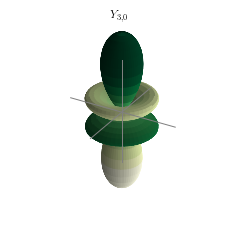

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('YlGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

Para graficar una familia de capas:

0 0
1 -1
1 0
1 1
2 -2
2 -1
2 0
2 1
2 2
3 -3
3 -2
3 -1
3 0
3 1
3 2
3 3
4 -4
4 -3
4 -2
4 -1
4 0
4 1
4 2
4 3
4 4
5 -5
5 -4
5 -3
5 -2
5 -1
5 0
5 1
5 2
5 3
5 4
5 5


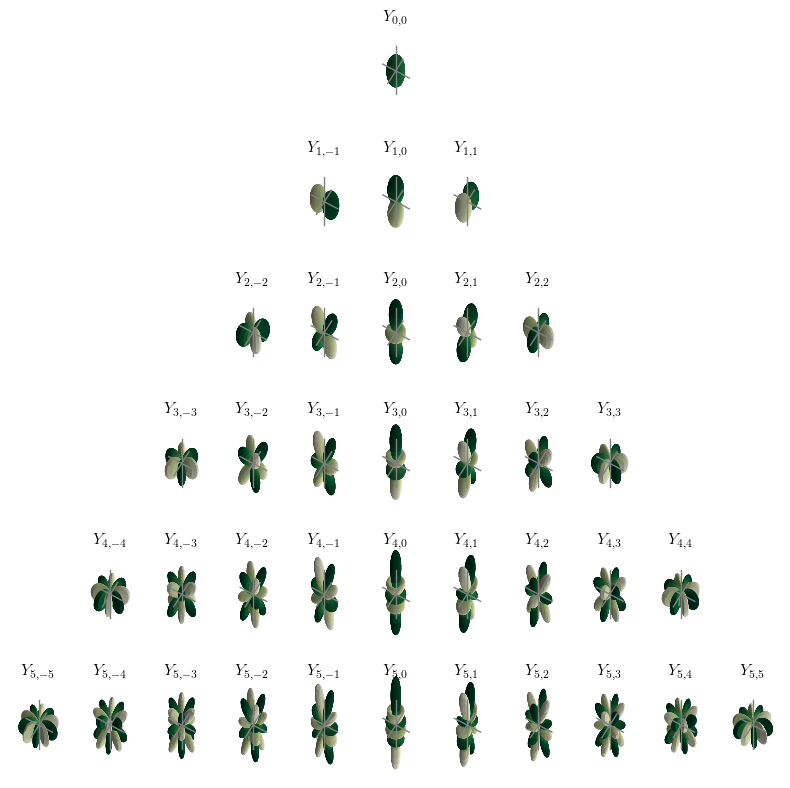

In [4]:
el_max = 5
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
# para salvar la imagen:
#plt.savefig('sph_harm.png')
plt.show()

Las funciones radiales, es decir, soluciones mecánicas cuánticas al atractivo potencial de Coulomb:

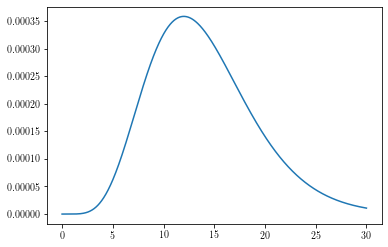

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import n, l, r, Z
from sympy.physics import hydrogen
from sympy.utilities.lambdify import lambdify

R_nl = lambdify((n, l, r, Z), hydrogen.R_nl(n, l, r, Z), ('numpy', 'math', 'sympy'))

Z = 1
n, l = 4,3
r = np.linspace(0, 30, 1000)

plt.plot(r, R_nl(n, l, r, Z)**2)